
# **Capstone Project - The Battle of Neighborhoods**
## **Shenzhen City Food Choice**





In [ ]:
#Part 1: Data about the districts of Shenzhen City
import numpy as np 
import pandas as pd 
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_administrative_divisions_of_Shenzhen')[0]

In [ ]:
df.head()

,Map,Name,Chinese (S),Hanyu Pinyin,Population(2010 census)[1],Area(km²),Density(/km²)
0,Futian Luohu Nanshan Yantian Bao'an Longgang P...,Futian District,福田区,Fútián Qū,1318055,79,16756
1,Futian Luohu Nanshan Yantian Bao'an Longgang P...,Luohu District,罗湖区,Luóhú Qū,923423,79,11726
2,Futian Luohu Nanshan Yantian Bao'an Longgang P...,Nanshan District,南山区,Nánshān Qū,1087936,182,5877
3,Futian Luohu Nanshan Yantian Bao'an Longgang P...,Yantian District,盐田区,Yántián Qū,208861,72,2798
4,Futian Luohu Nanshan Yantian Bao'an Longgang P...,Bao'an District,宝安区,Bǎo'ān Qū,2638807,402,6564


In [ ]:
df.drop("Map", axis=1, inplace=True)

In [ ]:
df.drop("Chinese (S)", axis=1, inplace=True)

In [ ]:
df.head()

,Name,Hanyu Pinyin,Population(2010 census)[1],Area(km²),Density(/km²)
0,Futian District,Fútián Qū,1318055,79,16756
1,Luohu District,Luóhú Qū,923423,79,11726
2,Nanshan District,Nánshān Qū,1087936,182,5877
3,Yantian District,Yántián Qū,208861,72,2798
4,Bao'an District,Bǎo'ān Qū,2638807,402,6564


In [ ]:
df.shape

(11, 5)

In [ ]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Shenzhen_food")

df['Major_Dist_Coord']= df['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Name,Hanyu Pinyin,Population(2010 census)[1],Area(km²),Density(/km²),Latitude,Longitude
0,Futian District,Fútián Qū,1318055,79,16756,22.524020,114.049939
1,Luohu District,Luóhú Qū,923423,79,11726,22.550639,114.126139
2,Nanshan District,Nánshān Qū,1087936,182,5877,22.536014,113.925622
3,Yantian District,Yántián Qū,208861,72,2798,22.559050,114.232441
4,Bao'an District,Bǎo'ān Qū,2638807,402,6564,22.559857,113.879040
5,Longgang District,Lónggǎng Qū,1831225,382,2794,22.723037,114.242656
6,Pingshan District,Píngshān Qū,309211,168,1852,22.711383,114.346188
7,Longhua District,Lónghuá Qū,1379000,175,7880,22.699431,114.039860
8,Guangming District,Guāngmíng Qū,481420,156,3097,22.751687,113.930006
9,Dapeng New District,Dàpéng Xīn Qū,180000,294,612,22.641600,114.411470


In [ ]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [ ]:
address = 'Shenzhen'

geolocator = Nominatim(user_agent="Shenzhen_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Shenzhen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Shenzhen are 22.555454, 114.0543297.


In [ ]:
# create map of Cologne using latitude and longitude 
map_shenzhen = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shenzhen) 
    
map_shenzhen

In [ ]:
CLIENT_ID = '1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN' # your Foursquare ID
CLIENT_SECRET = 'KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN
CLIENT_SECRET:KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO


In [ ]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Futian District are 22.5240202, 114.0499392.


In [ ]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN&client_secret=KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO&v=20180605&ll=22.5240202,114.0499392&radius=600&limit=15'

In [ ]:
results = requests.get(url).json()


In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Starbucks (星巴克),Coffee Shop,22.526412,114.051553
1,Pizza Hut (必胜客),Pizza Place,22.526288,114.051494
2,McDonald's (麦当劳),Fast Food Restaurant,22.525664,114.047822
3,福民天虹商场 Rainbow,Department Store,22.525429,114.048031
4,ZhuoYe Fitness,Gym / Fitness Center,22.525823,114.048351


In [ ]:
df.loc[0, 'Name']

'Futian District'

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print ('{} unique categories in Futian District.'.format(nearby_venues['categories'].value_counts().shape[0]))

6 venues were returned by Foursquare.
6 unique categories in Futian District.


In [ ]:
print (nearby_venues['categories'].value_counts()[0:15])

Fast Food Restaurant    1
Pizza Place             1
Gym / Fitness Center    1
Department Store        1
Metro Station           1
Coffee Shop             1
Name: categories, dtype: int64


In [ ]:
#E: Exploration of the neighbourhoods in Shenzhen.
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [ ]:
Shenzhen_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Futian District
Luohu District
Nanshan District
Yantian District
Bao'an District
Longgang District
Pingshan District
Longhua District
Guangming District
Dapeng New District
Total


In [ ]:
Shenzhen_venues.shape

(432, 7)

In [ ]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Shenzhen_Venues_only_restaurant = Shenzhen_venues[Shenzhen_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Shenzhen_Venues_only_restaurant.index = np.arange(1, len(Shenzhen_Venues_only_restaurant )+1)

In [ ]:
print (Shenzhen_Venues_only_restaurant['Venue Category'].value_counts())


Fast Food Restaurant         29
Italian Restaurant           26
Chinese Restaurant            9
Cantonese Restaurant          6
Seafood Restaurant            5
Indian Restaurant             5
Hotpot Restaurant             4
Japanese Restaurant           4
Hong Kong Restaurant          3
American Restaurant           2
Sushi Restaurant              2
New American Restaurant       2
Thai Restaurant               2
French Restaurant             1
Mexican Restaurant            1
Hainan Restaurant             1
Korean Restaurant             1
Japanese Curry Restaurant     1
Malay Restaurant              1
Dumpling Restaurant           1
Halal Restaurant              1
Turkish Restaurant            1
Xinjiang Restaurant           1
Szechuan Restaurant           1
Donburi Restaurant            1
Asian Restaurant              1
Vietnamese Restaurant         1
Restaurant                    1
Veneto Restaurant             1
Name: Venue Category, dtype: int64


In [ ]:
print('There are {} unique categories.'.format(len(Shenzhen_Venues_only_restaurant['Venue Category'].unique())))

There are 29 unique categories.


In [ ]:
# create a dataframe of top 10 categories
Shenzhen_Venues_Top10 = Shenzhen_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Shenzhen_Venues_Top10=Shenzhen_Venues_Top10.reset_index()
Shenzhen_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Shenzhen_Venues_Top10

,Venue_Category,Frequency
0,Fast Food Restaurant,29
1,Italian Restaurant,26
2,Chinese Restaurant,9
3,Cantonese Restaurant,6
4,Seafood Restaurant,5
5,Indian Restaurant,5
6,Hotpot Restaurant,4
7,Japanese Restaurant,4
8,Hong Kong Restaurant,3
9,American Restaurant,2


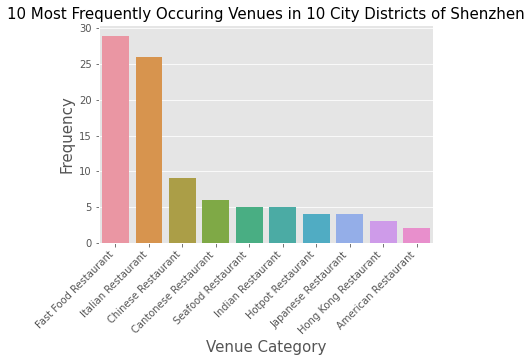

<Figure size 1296x504 with 0 Axes>

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Shenzhen_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 10 City Districts of Shenzhen', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [ ]:
#F: Size of the dataframe that results.
print ("Shape of the Data-Frame with Venue Shenzhen only Restaurant: ", Shenzhen_Venues_only_restaurant.shape)
Shenzhen_Venues_only_restaurant.head(115)

Shape of the Data-Frame with Venue Shenzhen only Restaurant:  (115, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Futian District,22.524020,114.049939,Bus Grill Turkish Steakhouse,22.537784,114.049103,Turkish Restaurant
2,Futian District,22.524020,114.049939,Wagas (沃歌斯),22.536488,114.049985,New American Restaurant
3,Futian District,22.524020,114.049939,Chunmanyuan (春满园),22.522176,114.060668,Cantonese Restaurant
4,Futian District,22.524020,114.049939,The Ritz-Carlton Club Lounge,22.536668,114.056089,American Restaurant
5,Futian District,22.524020,114.049939,AZZURRO,22.537946,114.049612,Italian Restaurant
6,Futian District,22.524020,114.049939,SHARK • Fine Wine & Dine,22.537917,114.049628,Seafood Restaurant
7,Futian District,22.524020,114.049939,CoCo Ichibanya (CoCo壱番屋),22.537497,114.054133,Japanese Curry Restaurant
8,Futian District,22.524020,114.049939,太興 Tai Hing,22.538023,114.053232,Hong Kong Restaurant
9,Futian District,22.524020,114.049939,Haidilao Hot Pot (海底捞火锅),22.534487,114.059540,Hotpot Restaurant
10,Futian District,22.524020,114.049939,Yes Thai Cuisine (鑫泰泰国料理),22.536659,114.049110,Thai Restaurant


In [ ]:
Venues_restaurant = Shenzhen_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [ ]:
#G: Analysis of the neighbourhoods.
Venues_restaurant

Neighborhood
Bao'an District         4
Dapeng New District     1
Futian District        33
Guangming District      1
Longgang District       2
Longhua District        1
Luohu District         16
Nanshan District       32
Total                  25
Name: Venue Category, dtype: int64

In [ ]:
Venues_restaurant_df  = Venues_restaurant.to_frame().reset_index()
Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Venues_restaurant_df.index = np.arange(1, len(Venues_restaurant_df)+1)
list_rest_no =Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Venues_restaurant_df['Neighborhood'].to_list()

In [ ]:
# one hot encoding
onehot = pd.get_dummies(Shenzhen_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = Shenzhen_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Malay Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Veneto Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
1,Futian District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Futian District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Futian District,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Futian District,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Futian District,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# New dataframe size.
onehot.shape

(115, 30)

In [ ]:
#H: Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,American Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant,Halal Restaurant,Hong Kong Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Korean Restaurant,Malay Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Turkish Restaurant,Veneto Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Bao'an District,0.000000,0.000000,0.000000,0.250000,0.00000,0.0000,0.750000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
1,Dapeng New District,0.000000,0.000000,0.000000,1.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
2,Futian District,0.030303,0.030303,0.030303,0.090909,0.00000,0.0000,0.151515,0.0000,0.030303,0.0000,0.060606,0.030303,0.030303,0.151515,0.030303,0.090909,0.00000,0.00000,0.030303,0.030303,0.0,0.030303,0.00000,0.030303,0.060606,0.030303,0.00,0.030303,0.00000
3,Guangming District,0.000000,0.000000,0.000000,1.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
4,Longgang District,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,1.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
5,Longhua District,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
6,Luohu District,0.000000,0.000000,0.062500,0.125000,0.00000,0.0625,0.062500,0.0625,0.000000,0.0625,0.062500,0.062500,0.125000,0.062500,0.000000,0.062500,0.00000,0.00000,0.000000,0.062500,0.0,0.062500,0.06250,0.000000,0.000000,0.000000,0.00,0.000000,0.00000
7,Nanshan District,0.031250,0.000000,0.125000,0.031250,0.03125,0.0000,0.562500,0.0000,0.000000,0.0000,0.000000,0.062500,0.031250,0.000000,0.000000,0.000000,0.03125,0.03125,0.000000,0.000000,0.0,0.000000,0.03125,0.000000,0.000000,0.000000,0.00,0.000000,0.03125
8,Total,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.040000,0.800000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.120000,0.00000,0.000000,0.000000,0.000000,0.04,0.000000,0.00000


In [ ]:
grouped.shape

(9, 30)

In [ ]:
#I: Print the neighbourhoods with their respective top 10 most common venues.
num_top_venues = 10

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bao'an District----
                   venue  freq
0   Fast Food Restaurant  0.75
1     Chinese Restaurant  0.25
2    American Restaurant  0.00
3      Korean Restaurant  0.00
4  Vietnamese Restaurant  0.00
5      Veneto Restaurant  0.00
6     Turkish Restaurant  0.00
7        Thai Restaurant  0.00
8    Szechuan Restaurant  0.00
9       Sushi Restaurant  0.00


----Dapeng New District----
                   venue  freq
0     Chinese Restaurant   1.0
1    American Restaurant   0.0
2    Japanese Restaurant   0.0
3  Vietnamese Restaurant   0.0
4      Veneto Restaurant   0.0
5     Turkish Restaurant   0.0
6        Thai Restaurant   0.0
7    Szechuan Restaurant   0.0
8       Sushi Restaurant   0.0
9     Seafood Restaurant   0.0


----Futian District----
                   venue  freq
0   Fast Food Restaurant  0.15
1     Italian Restaurant  0.15
2     Chinese Restaurant  0.09
3    Japanese Restaurant  0.09
4        Thai Restaurant  0.06
5   Hong Kong Restaurant  0.06
6    American Restaur

In [ ]:
#J: Creating a pandas dataframe.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bao'an District,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
1,Dapeng New District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
2,Futian District,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
3,Guangming District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
4,Longgang District,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,Longhua District,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
6,Luohu District,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant
7,Nanshan District,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
8,Total,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Veneto Restaurant,Xinjiang Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant


In [ ]:
#K: Clustering the neighbourhoods with k-means.
# set number of clusters (I choose 5)
kclusters = 5

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 1, 0, 2, 4, 1, 2, 3], dtype=int32)

In [ ]:
merged = df
merged.head(10)

,Name,Hanyu Pinyin,Population(2010 census)[1],Area(km²),Density(/km²),Latitude,Longitude
0,Futian District,Fútián Qū,1318055,79,16756,22.524020,114.049939
1,Luohu District,Luóhú Qū,923423,79,11726,22.550639,114.126139
2,Nanshan District,Nánshān Qū,1087936,182,5877,22.536014,113.925622
3,Yantian District,Yántián Qū,208861,72,2798,22.559050,114.232441
4,Bao'an District,Bǎo'ān Qū,2638807,402,6564,22.559857,113.879040
5,Longgang District,Lónggǎng Qū,1831225,382,2794,22.723037,114.242656
6,Pingshan District,Píngshān Qū,309211,168,1852,22.711383,114.346188
7,Longhua District,Lónghuá Qū,1379000,175,7880,22.699431,114.039860
8,Guangming District,Guāngmíng Qū,481420,156,3097,22.751687,113.930006
9,Dapeng New District,Dàpéng Xīn Qū,180000,294,612,22.641600,114.411470


In [ ]:
neighborhoods_venues_sorted.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bao'an District,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
1,Dapeng New District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
2,Futian District,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
3,Guangming District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
4,Longgang District,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,Longhua District,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
6,Luohu District,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant
7,Nanshan District,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
8,Total,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Veneto Restaurant,Xinjiang Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant


In [ ]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bao'an District,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
1,Dapeng New District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
2,Futian District,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
3,Guangming District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
4,Longgang District,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,Longhua District,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
6,Luohu District,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant
7,Nanshan District,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
8,Total,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Veneto Restaurant,Xinjiang Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant


In [ ]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)


In [ ]:
neighborhoods_venues_sorted_w_clusters.head(9)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Bao'an District,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
1,0,Dapeng New District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
2,1,Futian District,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
3,0,Guangming District,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
4,2,Longgang District,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,4,Longhua District,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
6,1,Luohu District,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant
7,2,Nanshan District,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
8,3,Total,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Veneto Restaurant,Xinjiang Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant


In [ ]:

merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
merged.head(10)

,Neighborhood,Hanyu Pinyin,Population(2010 census)[1],Area(km²),Density(/km²),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Futian District,Fútián Qū,1318055,79,16756,22.524020,114.049939,1.0,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
1,Luohu District,Luóhú Qū,923423,79,11726,22.550639,114.126139,1.0,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant
2,Nanshan District,Nánshān Qū,1087936,182,5877,22.536014,113.925622,2.0,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
3,Yantian District,Yántián Qū,208861,72,2798,22.559050,114.232441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bao'an District,Bǎo'ān Qū,2638807,402,6564,22.559857,113.879040,2.0,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,Longgang District,Lónggǎng Qū,1831225,382,2794,22.723037,114.242656,2.0,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
6,Pingshan District,Píngshān Qū,309211,168,1852,22.711383,114.346188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Longhua District,Lónghuá Qū,1379000,175,7880,22.699431,114.039860,4.0,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
8,Guangming District,Guāngmíng Qū,481420,156,3097,22.751687,113.930006,0.0,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
9,Dapeng New District,Dàpéng Xīn Qū,180000,294,612,22.641600,114.411470,0.0,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant


In [ ]:
merged['Cluster Labels'] = merged['Cluster Labels'].fillna(0)

merged = merged.astype({"Cluster Labels": int})

In [ ]:
#Finally, let's visualize the resulting clusters.

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(merged['Latitude'], 
                                  merged['Longitude'], 
                                  merged['Neighborhood'], 
                                  merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [ ]:
#L: Examination of the 5 clusters.
#Cluster 1
merged.loc[merged['Cluster Labels'] == 0,merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Hanyu Pinyin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Yántián Qū,22.559050,114.232441,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Píngshān Qū,22.711383,114.346188,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Guāngmíng Qū,22.751687,113.930006,0,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant
9,Dàpéng Xīn Qū,22.641600,114.411470,0,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Hainan Restaurant


In [ ]:
#Cluster 2
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]


,Hanyu Pinyin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fútián Qū,22.524020,114.049939,1,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Chinese Restaurant,Thai Restaurant,Hong Kong Restaurant,Japanese Curry Restaurant,Asian Restaurant,Cantonese Restaurant,Hainan Restaurant
1,Luóhú Qū,22.550639,114.126139,1,Indian Restaurant,Chinese Restaurant,New American Restaurant,Hong Kong Restaurant,Italian Restaurant,Halal Restaurant,Japanese Restaurant,French Restaurant,Fast Food Restaurant,Hotpot Restaurant


In [ ]:
#Cluster 3
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Hanyu Pinyin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Nánshān Qū,22.536014,113.925622,2,Fast Food Restaurant,Cantonese Restaurant,Hotpot Restaurant,Xinjiang Restaurant,Malay Restaurant,Chinese Restaurant,Donburi Restaurant,Indian Restaurant,Korean Restaurant,American Restaurant
4,Bǎo'ān Qū,22.559857,113.879040,2,Fast Food Restaurant,Chinese Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant
5,Lónggǎng Qū,22.723037,114.242656,2,Fast Food Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,French Restaurant,Hainan Restaurant


In [ ]:
#Cluster 4
merged.loc[merged['Cluster Labels'] == 3, merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Hanyu Pinyin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Total,45.420063,12.375136,3,Italian Restaurant,Seafood Restaurant,Indian Restaurant,Veneto Restaurant,Xinjiang Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant


In [ ]:
#Cluster 5
merged.loc[merged['Cluster Labels'] == 4,merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Hanyu Pinyin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lónghuá Qū,22.699431,114.03986,4,Restaurant,Xinjiang Restaurant,Italian Restaurant,Asian Restaurant,Cantonese Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant
